<a href="https://colab.research.google.com/github/savithrik199/DL-projects/blob/main/parkinsons_det.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

In [ ]:
parkDF = pd.read_csv("/content/drive/MyDrive/parkinsons.data")
parkDF.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
print("Null Values Check\n")
print(parkDF.isnull().sum())
print("\n\n NAN Values Check \n")
print(parkDF.isna().sum())

Null Values Check

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


 NAN Values Check 

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0


In [ ]:
numRows = parkDF.count(axis=0)[0]
print("Total no. of rows in the data: ", numRows)

Total no. of rows in the data:  195


In [ ]:
cols = parkDF.columns[1:]
print(cols)
print()
print("No. of Columns: ", len(cols))

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

No. of Columns:  23


In [ ]:
numparkPat = parkDF[parkDF["status"] == 1].status.count()
print("Parkinsons Patients:\n", numparkPat)
print("Percentage of patients with Parkinsons:\n", round((numparkPat * 100)/numRows))

Parkinsons Patients:
 147
Percentage of patients with Parkinsons:
 75


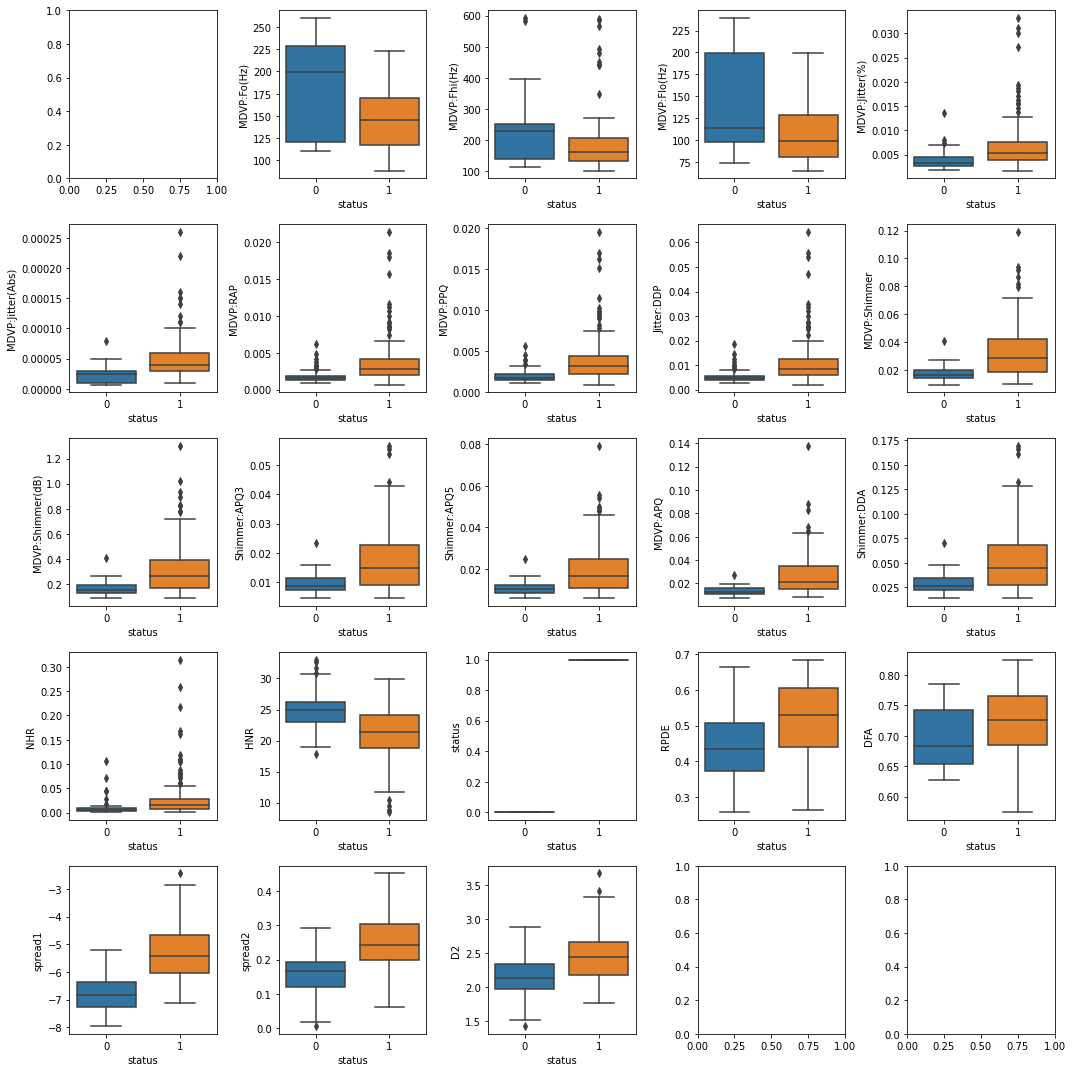

In [ ]:
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

# Skipping name since it's a string column 
for i in range(1,len(parkDF.columns)-1):
    sns.boxplot(x='status',y=parkDF.iloc[:,i],data=parkDF,orient='v',ax=axes[i])
plt.tight_layout()
plt.show()

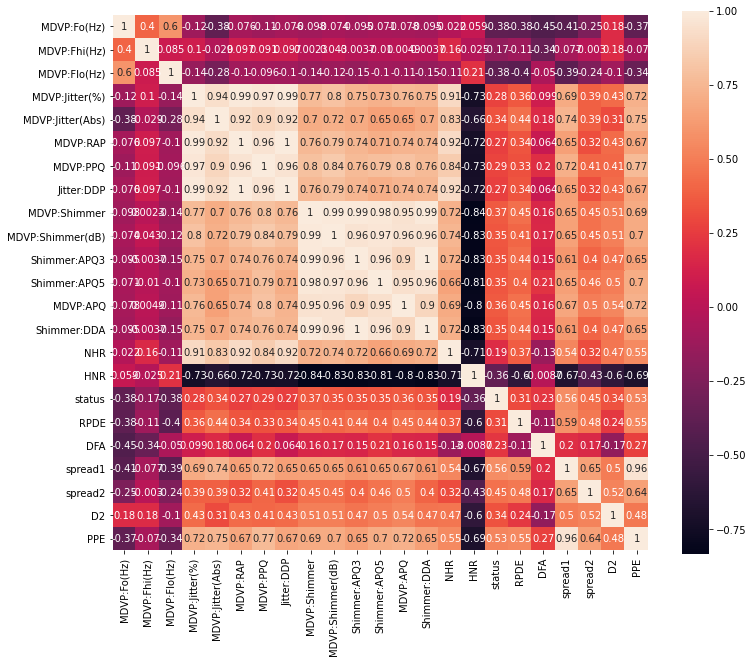

In [ ]:
corr = parkDF.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True, square=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


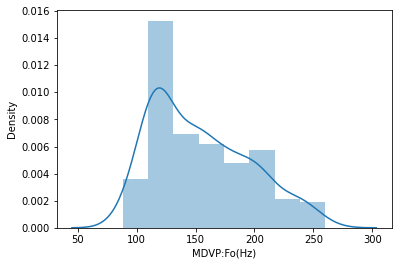

In [ ]:
sns.distplot(parkDF["MDVP:Fo(Hz)"])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


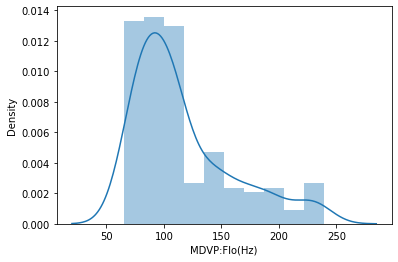

In [ ]:
sns.distplot(parkDF["MDVP:Flo(Hz)"])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


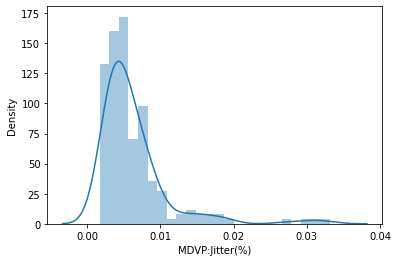

In [ ]:
sns.distplot(parkDF["MDVP:Jitter(%)"])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


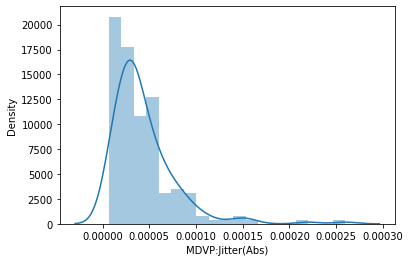

In [ ]:
sns.distplot(parkDF["MDVP:Jitter(Abs)"])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


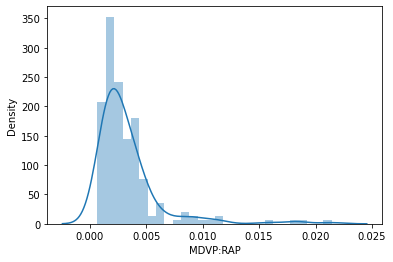

In [ ]:
sns.distplot(parkDF["MDVP:RAP"])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


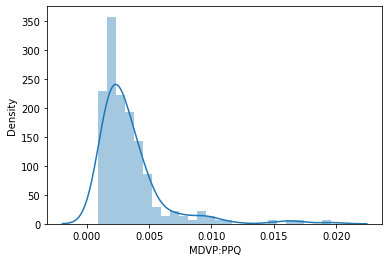

In [ ]:
sns.distplot(parkDF["MDVP:PPQ"])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


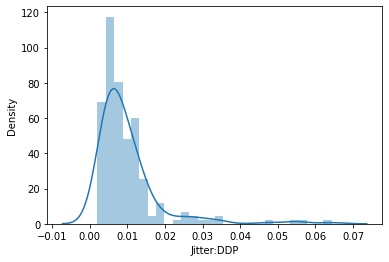

In [ ]:
sns.distplot(parkDF["Jitter:DDP"])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


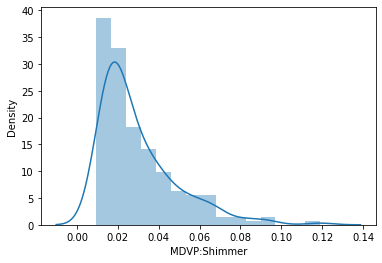

In [ ]:
sns.distplot(parkDF["MDVP:Shimmer"])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


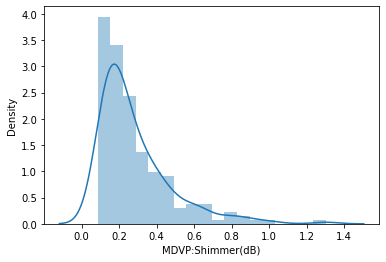

In [ ]:
sns.distplot(parkDF["MDVP:Shimmer(dB)"])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


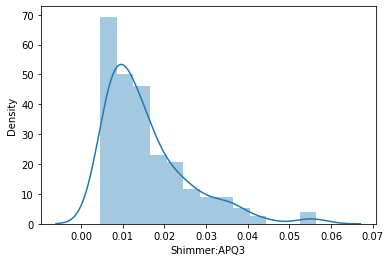

In [ ]:
sns.distplot(parkDF["Shimmer:APQ3"])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


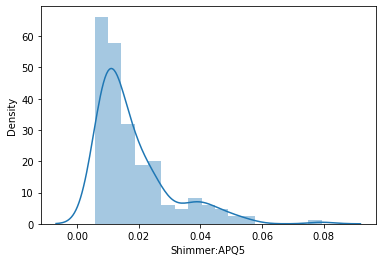

In [ ]:
sns.distplot(parkDF["Shimmer:APQ5"])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


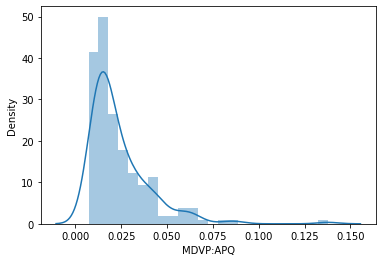

In [ ]:
sns.distplot(parkDF["MDVP:APQ"])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


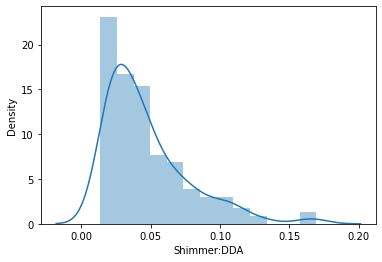

In [ ]:
sns.distplot(parkDF["Shimmer:DDA"])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


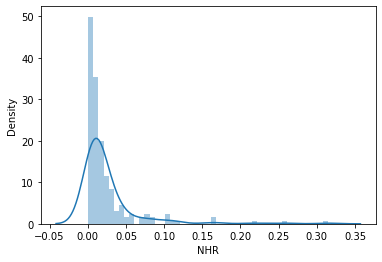

In [ ]:
sns.distplot(parkDF["NHR"])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


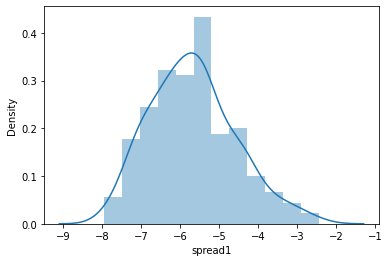

In [ ]:
sns.distplot(parkDF["spread1"])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


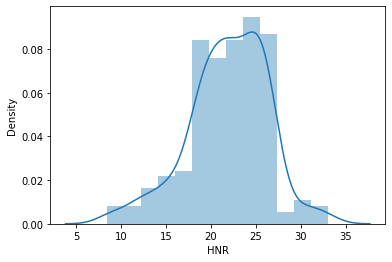

In [ ]:
sns.distplot(parkDF["HNR"])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


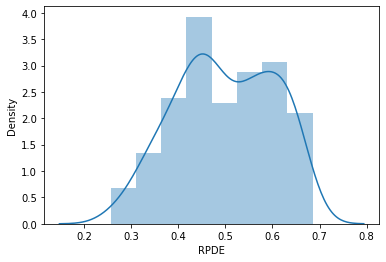

In [ ]:
sns.distplot(parkDF["RPDE"])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


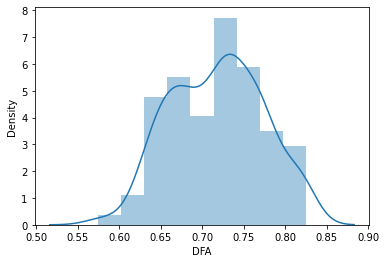

In [ ]:
sns.distplot(parkDF["DFA"])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


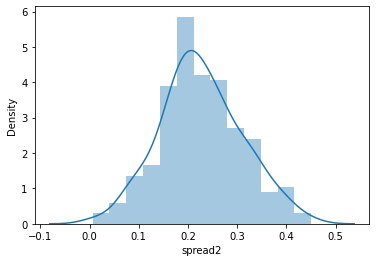

In [ ]:
sns.distplot(parkDF["spread2"])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


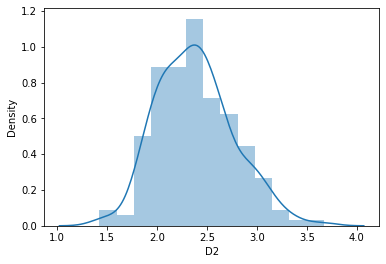

In [ ]:
sns.distplot(parkDF["D2"])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


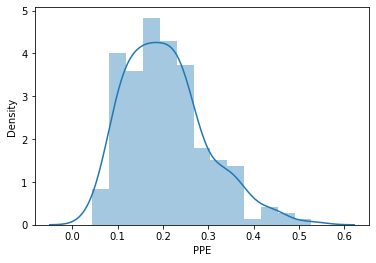

In [ ]:
sns.distplot(parkDF["PPE"])


In [ ]:
parkDF.drop(columns ='name',inplace=True)
#Let us also drop a few parameters that have a strong relationship with another
parkDF.drop(columns ='Shimmer:DDA',inplace=True)
parkDF.drop(columns ='Jitter:DDP',inplace=True)
parkDF.drop(columns ='MDVP:RAP',inplace=True)

parkDF.head()
X = parkDF.drop('status', axis=1) # X axis without the Target Variable
y= parkDF['status'] # target variable on y Axis
cols = X.columns
print(cols)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:PPQ', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)',
       'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [ ]:
X_train.head()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:PPQ,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
49,122.964,130.049,114.676,0.00428,0.00003,0.00155,0.01681,0.154,0.00930,0.00802,0.01400,0.00462,24.971,0.538688,0.754073,-6.482096,0.264967,2.054419,0.128872
180,150.440,163.441,144.736,0.00396,0.00003,0.00233,0.02551,0.237,0.01321,0.01574,0.02148,0.00611,23.133,0.352396,0.759320,-6.261446,0.183218,2.264226,0.144105
102,139.224,586.567,66.157,0.03011,0.00022,0.01628,0.09419,0.930,0.05551,0.05005,0.06023,0.25930,10.489,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
151,192.818,224.429,168.793,0.03107,0.00016,0.01958,0.11908,1.302,0.05647,0.07940,0.13778,0.21713,8.441,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
91,151.955,163.335,147.226,0.00419,0.00003,0.00227,0.07959,0.772,0.04421,0.04962,0.05690,0.01658,19.664,0.501037,0.714360,-6.411497,0.207156,2.344876,0.134120


In [ ]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.fit_transform(X_test)

X_train_scaled = pd.DataFrame(train_scaled)
X_test_scaled = pd.DataFrame(test_scaled)

# Replace the Columns Headers back
X_train_scaled.columns = cols
X_test_scaled.columns = cols
X_train_scaled.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:PPQ,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,0.204969,0.046115,0.293524,0.082592,0.083665,0.033762,0.066368,0.056697,0.091487,0.031479,0.052148,0.012636,0.671787,0.652517,0.721467,0.268107,0.582355,0.280769,0.174665
1,0.386287,0.115061,0.473864,0.072427,0.083665,0.075563,0.145791,0.124897,0.166795,0.136228,0.109426,0.017379,0.597090,0.210540,0.742522,0.308001,0.398326,0.374105,0.206214
2,0.312271,0.988720,0.002442,0.903113,0.840637,0.823151,0.772777,0.694330,0.981510,0.601764,0.406157,0.823280,0.083232,0.789348,0.269404,0.848949,0.595128,0.563925,0.828939
3,0.665945,0.240988,0.618190,0.933609,0.601594,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.689054,0.000000,0.859347,0.778637,1.000000,1.000000,0.736669,1.000000
4,0.396285,0.114843,0.488802,0.079733,0.083665,0.072347,0.639492,0.564503,0.763867,0.595929,0.380657,0.050705,0.456108,0.563190,0.562106,0.280871,0.452214,0.409984,0.185534


In [ ]:
numRows = X_train_scaled.count(axis=0)[0]
print("Total no. of rows in the training set: ", numRows)
numRows = X_test_scaled.count(axis=0)[0]
print("Total no. of rows in the testing set: ", numRows)

Total no. of rows in the training set:  136
Total no. of rows in the testing set:  59


In [ ]:
perf_column_name = ['Model','Train Accu','Test Accu','F1-Score','Recall','AUC']
perfDF = pd.DataFrame(columns = perf_column_name)

#Function to collect and add Model Performance Results
def BuildPerformanceData(model, modelname, y_predict, perfDF):
    class_rep = classification_report(y_test,y_predict, output_dict=True)
        #AUC Calculations
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict, pos_label=1)
    arg1 = round(model.score(X_train_scaled,y_train) * 100,2)
    arg2 = round(model.score(X_test_scaled,y_test) * 100,2)
    arg4 = round(class_rep['1']['f1-score'] * 100, 2)
    arg5 = round(class_rep['1']['recall'] * 100,2)
    arg6 = round(metrics.auc(fpr, tpr)*100,2)
    perfDF = perfDF.append({'Model':modelname,'Train Accu':arg1,'Test Accu':arg2, 'F1-Score':arg4,'Recall':arg5,'AUC':arg6},ignore_index=True)
    return perfDF

#Function to print Confusion Matrix and Classification Report
def Print_CM_CR_AUC(y_test,y_predict, algoname):
    cm = confusion_matrix(y_test,y_predict)
    sns.heatmap(cm,annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
    plt.ylabel('observed')
    plt.xlabel('Predicted')
    plt.show()
    # get accuracy of model
    acc_score = accuracy_score(y_test,y_predict)
    # get F1-score of model
    F1_score = f1_score(y_test,y_predict) 
    # get the classification report
    class_rep = classification_report(y_test,y_predict)

    print("Accuracy of ", algoname, " is {} %".format(acc_score*100))
    print("F1-score of ", algoname, " is {} %".format(F1_score*100))
    print("Classification report for ", algoname, " is: \n",class_rep)
    
    #AUC Calculations
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict, pos_label=1)
    print("AUC for ", algoname, ":", round(metrics.auc(fpr, tpr)*100,2))

In [ ]:
error_rate = []

for i in range(1,100):
 NNH = KNeighborsClassifier(n_neighbors=i)
 NNH.fit(X_train_scaled,y_train)
 KNN_predicted_labels = NNH.predict(X_test_scaled)
 error_rate.append(np.mean(KNN_predicted_labels != y_test))

Text(0, 0.5, 'Error Rate')

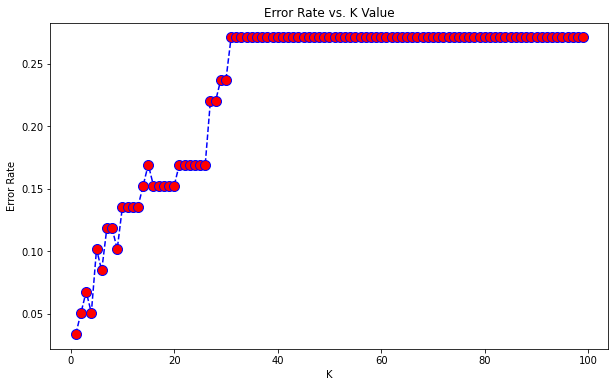

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color= 'blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
K = 4

NNH = KNeighborsClassifier(n_neighbors= K)

# Call Nearest Neighbour algorithm
NNH.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
KNN_predicted_labels = NNH.predict(X_train_scaled)
train_acc = metrics.accuracy_score(y_train, KNN_predicted_labels)
print("Model Accuracy with Training Data: {0:.4f}".format(metrics.accuracy_score(y_train, KNN_predicted_labels)*100))
print()

KNN_predicted_labels = NNH.predict(X_test_scaled)
test_acc = metrics.accuracy_score(y_test, KNN_predicted_labels)
print("Model Accuracy with Testing Data: {0:.4f}".format(metrics.accuracy_score(y_test, KNN_predicted_labels)*100))
print()

Model Accuracy with Training Data: 94.8529

Model Accuracy with Testing Data: 94.9153



In [ ]:
C = 100
gamma=0.001
SVCL = svm.SVC(C=C,gamma=gamma)
SVCL.fit(X_train_scaled , y_train)
SVC_Predicted_labels = SVCL.predict(X_train_scaled)

print("Model Accuracy with Training Data: {0:.4f}".format(metrics.accuracy_score(y_train, SVC_Predicted_labels)*100))
print()

SVC_Predicted_labels = SVCL.predict(X_test_scaled)

print("Model Accuracy with Testing Data: {0:.4f}".format(metrics.accuracy_score(y_test, SVC_Predicted_labels)*100))
print()

Model Accuracy with Training Data: 76.4706

Model Accuracy with Testing Data: 74.5763



In [ ]:
LR = LogisticRegression(solver="liblinear")
LR.fit(X_train_scaled, y_train)
LR_predicted_labels = LR.predict(X_train_scaled)

print("Model Accuracy with Training Data: {0:.4f}".format(metrics.accuracy_score(y_train, LR_predicted_labels)*100))
print()

LR_predicted_labels = LR.predict(X_test_scaled)

print("Model Accuracy with Testing data: {0:.4f}".format(metrics.accuracy_score(y_test, LR_predicted_labels)*100))
print()

Model Accuracy with Training Data: 84.5588

Model Accuracy with Testing data: 86.4407



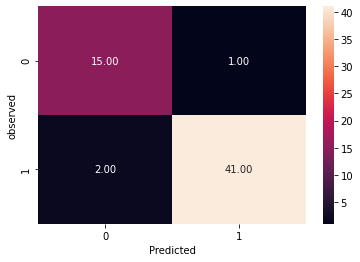

Accuracy of  KNN  is 94.91525423728814 %
F1-score of  KNN  is 96.47058823529412 %
Classification report for  KNN  is: 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.98      0.95      0.96        43

    accuracy                           0.95        59
   macro avg       0.93      0.95      0.94        59
weighted avg       0.95      0.95      0.95        59

AUC for  KNN : 94.55


,Model,Train Accu,Test Accu,F1-Score,Recall,AUC
0,KNN,94.85,94.92,96.47,95.35,94.55


In [ ]:
Print_CM_CR_AUC(y_test,KNN_predicted_labels, "KNN")
perfDF = BuildPerformanceData(NNH, "KNN", KNN_predicted_labels, perfDF)
perfDF

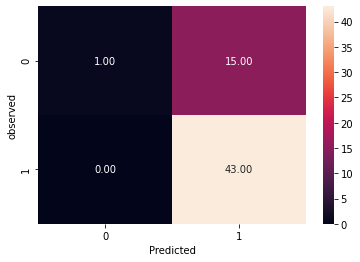

Accuracy of  SVC  is 74.57627118644068 %
F1-score of  SVC  is 85.14851485148515 %
Classification report for  SVC  is: 
               precision    recall  f1-score   support

           0       1.00      0.06      0.12        16
           1       0.74      1.00      0.85        43

    accuracy                           0.75        59
   macro avg       0.87      0.53      0.48        59
weighted avg       0.81      0.75      0.65        59

AUC for  SVC : 53.12


,Model,Train Accu,Test Accu,F1-Score,Recall,AUC
0,KNN,94.85,94.92,96.47,95.35,94.55
1,SVC,76.47,74.58,85.15,100.00,53.12


In [ ]:
Print_CM_CR_AUC(y_test,SVC_Predicted_labels, "SVC")
perfDF = BuildPerformanceData(SVCL, "SVC", SVC_Predicted_labels, perfDF)
perfDF

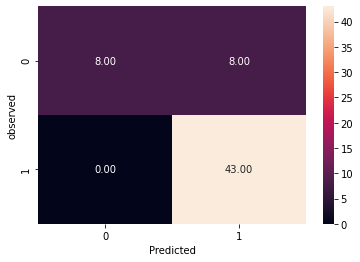

Accuracy of  Logistic Regression  is 86.4406779661017 %
F1-score of  Logistic Regression  is 91.48936170212765 %
Classification report for  Logistic Regression  is: 
               precision    recall  f1-score   support

           0       1.00      0.50      0.67        16
           1       0.84      1.00      0.91        43

    accuracy                           0.86        59
   macro avg       0.92      0.75      0.79        59
weighted avg       0.89      0.86      0.85        59

AUC for  Logistic Regression : 75.0


,Model,Train Accu,Test Accu,F1-Score,Recall,AUC
0,KNN,94.85,94.92,96.47,95.35,94.55
1,SVC,76.47,74.58,85.15,100.00,53.12
2,Logistic Regression,84.56,86.44,91.49,100.00,75.00


In [ ]:
Print_CM_CR_AUC(y_test,LR_predicted_labels, "Logistic Regression")
perfDF = BuildPerformanceData(LR, "Logistic Regression", LR_predicted_labels, perfDF)
perfDF

In [ ]:
Model	Train Test  F1-Sc	Recall	AUC
0	KNN	94.85	94.92	96.47	95.35	 94.55
1	SVC	76.47	74.58	85.15	100.00	53.12
2	Log	84.56	86.44	91.49	100.00	75.00

SyntaxError: ignored

In [ ]:
estimators = [
    ('knn', KNeighborsClassifier(n_neighbors= K)),
     ('svm', svm.SVC(gamma=gamma, C=C)),
     ('lr', LogisticRegression(solver="liblinear"))
]

STCL = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

STCL.fit(X_train_scaled, y_train)

print("Model Accuracy with Training Data: {0:.4f}".format(STCL.score(X_train_scaled,y_train)*100))
print()

print("Model Accuracy with Testing Data: {0:.4f}".format(STCL.score(X_test_scaled,y_test)*100))
print()

STCL_predicted_labels = STCL.predict(X_test_scaled)

In [ ]:
Model	Train	Test	F1-Sc	Recall	AUC
0	KNN	94.85	94.92	96.47	95.35	94.55
1	SVC	76.47	74.58	85.15	100.00	53.12
3	Log	84.56	86.44	91.49	100.00	75.00
4	stac	94.85	94.92	96.55	97.67	92.59

SyntaxError: ignored

In [ ]:
dTree = DecisionTreeClassifier(criterion = 'gini', max_depth = 2, random_state=1)
dTree.fit(X_train_scaled, y_train)
print("Model Accuracy with Training Data: {0:.4f}".format(dTree.score(X_train_scaled,y_train)*100))
print()

print("Model Accuracy with Testing Data: {0:.4f}".format(dTree.score(X_test_scaled,y_test)*100))
print()

dTree_predicted_labels = dTree.predict(X_test_scaled)

Model Accuracy with Training Data: 86.7647

Model Accuracy with Testing Data: 86.4407



In [ ]:
from sklearn.ensemble import BaggingClassifier
BGCL = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)
BGCL.fit(X_train_scaled, y_train)

print("Model Accuracy with Training Data: {0:.4f}".format(BGCL.score(X_train_scaled,y_train)*100))
print()

print("Model Accuracy with Testing Data: {0:.4f}".format(BGCL.score(X_test_scaled,y_test)*100))
print()

BGCL_predicted_labels = BGCL.predict(X_test_scaled)

Model Accuracy with Training Data: 87.5000

Model Accuracy with Testing Data: 88.1356



In [ ]:
ABCL = AdaBoostClassifier(n_estimators=10, random_state=1)
ABCL.fit(X_train_scaled, y_train)

print("Model Accuracy with Training Data: {0:.4f}".format(ABCL.score(X_train_scaled,y_train)*100))
print()

print("Model Accuracy with Testing Data: {0:.4f}".format(ABCL.score(X_test_scaled,y_test)*100))
print()

ABCL_predicted_labels = ABCL.predict(X_test_scaled)

Model Accuracy with Training Data: 96.3235

Model Accuracy with Testing Data: 88.1356



In [ ]:
GBCL = GradientBoostingClassifier(n_estimators = 10,random_state=1)
GBCL.fit(X_train_scaled, y_train)

print("Model Accuracy with Training Data: {0:.4f}".format(GBCL.score(X_train_scaled,y_train)*100))
print()

print("Model Accuracy with Testing Data: {0:.4f}".format(GBCL.score(X_test_scaled,y_test)*100))
print()

GBCL_predicted_labels = GBCL.predict(X_test_scaled)

Model Accuracy with Training Data: 96.3235

Model Accuracy with Testing Data: 91.5254



In [ ]:
RFCL = RandomForestClassifier(n_estimators = 10, random_state=1,max_features=10)
RFCL.fit(X_train_scaled, y_train)

print("Model Accuracy with Training Data: {0:.4f}".format(RFCL.score(X_train_scaled,y_train)*100))
print()

print("Model Accuracy with Testing Data: {0:.4f}".format(RFCL.score(X_test_scaled,y_test)*100))
print()

RFCL_predicted_labels = RFCL.predict(X_test_scaled)

Model Accuracy with Training Data: 98.5294

Model Accuracy with Testing Data: 93.2203



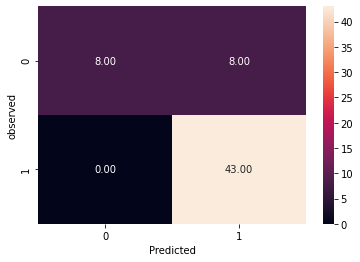

Accuracy of  Decision Tree  is 86.4406779661017 %
F1-score of  Decision Tree  is 91.48936170212765 %
Classification report for  Decision Tree  is: 
               precision    recall  f1-score   support

           0       1.00      0.50      0.67        16
           1       0.84      1.00      0.91        43

    accuracy                           0.86        59
   macro avg       0.92      0.75      0.79        59
weighted avg       0.89      0.86      0.85        59

AUC for  Decision Tree : 75.0


,Model,Train Accu,Test Accu,F1-Score,Recall,AUC
0,KNN,94.85,94.92,96.47,95.35,94.55
1,SVC,76.47,74.58,85.15,100.00,53.12
2,Logistic Regression,84.56,86.44,91.49,100.00,75.00
3,Decision Tree,86.76,86.44,91.49,100.00,75.00


In [ ]:
Print_CM_CR_AUC(y_test,dTree_predicted_labels, "Decision Tree")
perfDF = BuildPerformanceData(dTree, "Decision Tree", dTree_predicted_labels, perfDF)
perfDF

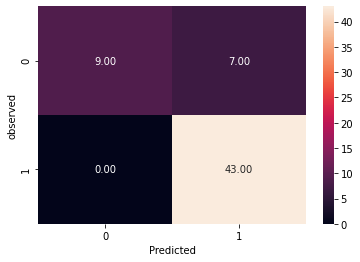

Accuracy of  Bagging  is 88.13559322033898 %
F1-score of  Bagging  is 92.4731182795699 %
Classification report for  Bagging  is: 
               precision    recall  f1-score   support

           0       1.00      0.56      0.72        16
           1       0.86      1.00      0.92        43

    accuracy                           0.88        59
   macro avg       0.93      0.78      0.82        59
weighted avg       0.90      0.88      0.87        59

AUC for  Bagging : 78.12


,Model,Train Accu,Test Accu,F1-Score,Recall,AUC
0,KNN,94.85,94.92,96.47,95.35,94.55
1,SVC,76.47,74.58,85.15,100.00,53.12
2,Logistic Regression,84.56,86.44,91.49,100.00,75.00
3,Decision Tree,86.76,86.44,91.49,100.00,75.00
4,Bagging,87.50,88.14,92.47,100.00,78.12


In [ ]:

Print_CM_CR_AUC(y_test,BGCL_predicted_labels, "Bagging")
perfDF = BuildPerformanceData(BGCL, "Bagging", BGCL_predicted_labels, perfDF)
perfDF

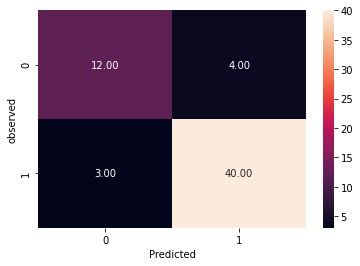

Accuracy of  AdaBoost  is 88.13559322033898 %
F1-score of  AdaBoost  is 91.95402298850574 %
Classification report for  AdaBoost  is: 
               precision    recall  f1-score   support

           0       0.80      0.75      0.77        16
           1       0.91      0.93      0.92        43

    accuracy                           0.88        59
   macro avg       0.85      0.84      0.85        59
weighted avg       0.88      0.88      0.88        59

AUC for  AdaBoost : 84.01


,Model,Train Accu,Test Accu,F1-Score,Recall,AUC
0,KNN,94.85,94.92,96.47,95.35,94.55
1,SVC,76.47,74.58,85.15,100.00,53.12
2,Logistic Regression,84.56,86.44,91.49,100.00,75.00
3,Decision Tree,86.76,86.44,91.49,100.00,75.00
4,Bagging,87.50,88.14,92.47,100.00,78.12
5,AdaBoost,96.32,88.14,91.95,93.02,84.01


In [ ]:

Print_CM_CR_AUC(y_test,ABCL_predicted_labels, "AdaBoost")
perfDF = BuildPerformanceData(ABCL, "AdaBoost", ABCL_predicted_labels, perfDF)
perfDF

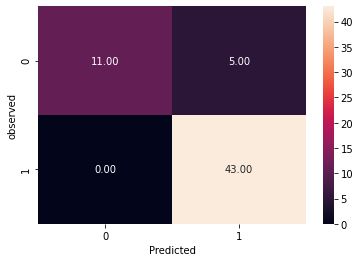

Accuracy of  Gradiaent Boost  is 91.52542372881356 %
F1-score of  Gradiaent Boost  is 94.5054945054945 %
Classification report for  Gradiaent Boost  is: 
               precision    recall  f1-score   support

           0       1.00      0.69      0.81        16
           1       0.90      1.00      0.95        43

    accuracy                           0.92        59
   macro avg       0.95      0.84      0.88        59
weighted avg       0.92      0.92      0.91        59

AUC for  Gradiaent Boost : 84.38


,Model,Train Accu,Test Accu,F1-Score,Recall,AUC
0,KNN,94.85,94.92,96.47,95.35,94.55
1,SVC,76.47,74.58,85.15,100.00,53.12
2,Logistic Regression,84.56,86.44,91.49,100.00,75.00
3,Decision Tree,86.76,86.44,91.49,100.00,75.00
4,Bagging,87.50,88.14,92.47,100.00,78.12
5,AdaBoost,96.32,88.14,91.95,93.02,84.01
6,Gradiaent Boost,96.32,91.53,94.51,100.00,84.38


In [ ]:
Print_CM_CR_AUC(y_test,GBCL_predicted_labels, "Gradiaent Boost")
perfDF = BuildPerformanceData(GBCL, "Gradiaent Boost", GBCL_predicted_labels, perfDF)
perfDF

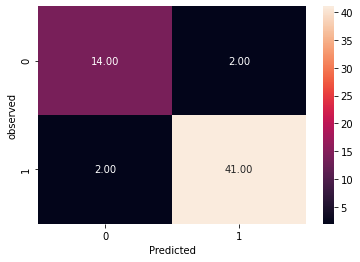

Accuracy of  Random Forest  is 93.22033898305084 %
F1-score of  Random Forest  is 95.34883720930233 %
Classification report for  Random Forest  is: 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.95      0.95      0.95        43

    accuracy                           0.93        59
   macro avg       0.91      0.91      0.91        59
weighted avg       0.93      0.93      0.93        59

AUC for  Random Forest : 91.42


,Model,Train Accu,Test Accu,F1-Score,Recall,AUC
0,KNN,94.85,94.92,96.47,95.35,94.55
1,SVC,76.47,74.58,85.15,100.00,53.12
2,Logistic Regression,84.56,86.44,91.49,100.00,75.00
3,Decision Tree,86.76,86.44,91.49,100.00,75.00
4,Bagging,87.50,88.14,92.47,100.00,78.12
5,AdaBoost,96.32,88.14,91.95,93.02,84.01
6,Gradiaent Boost,96.32,91.53,94.51,100.00,84.38
7,Random Forest,98.53,93.22,95.35,95.35,91.42


In [ ]:
Print_CM_CR_AUC(y_test,RFCL_predicted_labels, "Random Forest")
perfDF = BuildPerformanceData(RFCL, "Random Forest", RFCL_predicted_labels, perfDF)
perfDF

In [ ]:
	Model	Train	Test F1sc	Recall	AUC
0	KNN	94.85	94.92	96.47	95.35	 94.55
1	SVC	76.47	74.58	85.15	100.00	53.12
3	Log	84.56	86.44	91.49	100.00	75.00
4	Met	94.85	94.92	96.55	97.67	  92.59
5	Det	86.76	86.44	91.49	100.00	75.00
6	Bag	87.50	88.14	92.47	100.00	78.12
7	Ada	96.32	88.14	91.95	93.02	  84.01
8	Gra	96.32	91.53	94.51	100.00	84.38
9	Raf	98.53	93.22	95.35	95.35	  91.42

SyntaxError: ignored